In [1]:
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

from hfnet.datasets.hpatches import Hpatches
from hfnet.evaluation.loaders import sift_loader, export_loader, fast_loader, harris_loader
from hfnet.evaluation.keypoint_detectors import evaluate

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
data_config = {'make_pairs': True, 'shuffle': True}
dataset = Hpatches(**data_config)

In [20]:
config = {
    'id': 'sift_300-kpts',
    'predictor': sift_loader,
    'num_features': 300,
    'do_nms': True,
    'nms_thresh': 8,
    'correct_match_thresh': 3,
}

In [12]:
config = {
    'id': 'fast_300-kpts',
    'predictor': fast_loader,
    'num_features': 300,
    'do_nms': True,
    'nms_thresh': 8,
    'correct_match_thresh': 3,
}

In [10]:
config = {
    'id': 'harris_300-kpts',
    'predictor': harris_loader,
    'num_features': 300,
    'do_nms': True,
    'nms_thresh': 8,
    'correct_match_thresh': 3,
}

In [14]:
config = {
    'id': 'superpoint_300-kpts',
    'experiment': 'super_point_pytorch/hpatches',
    'predictor': export_loader,
    'num_features': 300,
    'do_nms': True,
    'nms_thresh': 8,
    'remove_borders': 4,
    'correct_match_thresh': 3,
}

In [16]:
config = {
    'id': 'lfnet_300-kpts',
    'experiment': 'lfnet/hpatches_kpts-500',
    'predictor': export_loader,
    'num_features': 300,
    'correct_match_thresh': 3,
}

# Metrics

In [ ]:
data_iter = dataset.get_test_set()
metrics, precision, recall, scores = evaluate(data_iter, config)
print('> {}'.format(config['id']))
for k, v in metrics.items():
    print('{:<25} {:.3f}'.format(k, v))
print(config)

## NMS=8

580it [01:33,  6.20it/s]

> harris_300-kpts
average_num_keypoints     239.023
localization_error        1.153
repeatability             0.464
mAP                       0.267
{'id': 'harris_300-kpts', 'predictor': <function harris_loader at 0x2b565c295378>, 'num_features': 300, 'do_nms': True, 'nms_thresh': 8, 'correct_match_thresh': 3}


580it [01:17,  7.46it/s]

> fast_300-kpts
average_num_keypoints     298.618
localization_error        1.106
repeatability             0.408
mAP                       0.196
{'id': 'fast_300-kpts', 'predictor': <function fast_loader at 0x2b565c2952f0>, 'num_features': 300, 'do_nms': True, 'nms_thresh': 8, 'correct_match_thresh': 3}


580it [01:30,  6.41it/s]


> superpoint_300-kpts
average_num_keypoints     296.654
localization_error        1.047
repeatability             0.489
mAP                       0.269
{'id': 'superpoint_300-kpts', 'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2b565c295400>, 'num_features': 300, 'do_nms': True, 'nms_thresh': 8, 'remove_borders': 4, 'correct_match_thresh': 3}


580it [03:03,  3.72it/s]

> sift_300-kpts
average_num_keypoints     299.966
localization_error        1.041
repeatability             0.365
mAP                       0.168
{'id': 'sift_300-kpts', 'predictor': <function sift_loader at 0x2b565c285a60>, 'num_features': 300, 'do_nms': True, 'nms_thresh': 8, 'correct_match_thresh': 3}


## NMS=4

580it [01:29,  6.46it/s]

> harris_300-kpts
average_num_keypoints     260.684
localization_error        1.176
repeatability             0.531
mAP                       0.356
{'id': 'harris_300-kpts', 'predictor': <function harris_loader at 0x2b934036af28>, 'num_features': 300, 'do_nms': True, 'correct_match_thresh': 3}


580it [01:18,  7.40it/s]

> fast_300-kpts
average_num_keypoints     299.851
localization_error        1.116
repeatability             0.477
mAP                       0.268
{'id': 'fast_300-kpts', 'predictor': <function fast_loader at 0x2b934036aea0>, 'num_features': 300, 'do_nms': True, 'correct_match_thresh': 3}


580it [01:39, 11.22it/s]


> superpoint_300-kpts
average_num_keypoints     298.055
localization_error        1.041
repeatability             0.496
mAP                       0.276
{'id': 'superpoint_300-kpts', 'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2b9340379048>, 'num_features': 300, 'do_nms': True, 'nms_thresh': 4, 'remove_borders': 4, 'correct_match_thresh': 3}


580it [03:07,  3.59it/s]

> sift_300-kpts
average_num_keypoints     300.000
localization_error        1.030
repeatability             0.420
mAP                       0.212
{'id': 'sift_300-kpts', 'predictor': <function sift_loader at 0x2b565c285a60>, 'num_features': 300, 'do_nms': True, 'nms_thresh': 4, 'correct_match_thresh': 3}


## Default

580it [00:59,  9.73it/s]


> lfnet_300-kpts
average_num_keypoints     300.000
localization_error        1.143
repeatability             0.466
mAP                       0.277
{'id': 'lfnet_300-kpts', 'experiment': 'lfnet/hpatches_kpts-500', 'predictor': <function export_loader at 0x2b9340379048>, 'num_features': 300, 'correct_match_thresh': 3}


580it [03:01,  4.19it/s]

> sift_300-kpts_no-nms
average_num_keypoints     300.000
localization_error        0.997
repeatability             0.438
mAP                       0.225
{'id': 'sift_300-kpts_no-nms', 'predictor': <function sift_loader at 0x2b565c285a60>, 'num_features': 300, 'do_nms': False, 'correct_match_thresh': 3}


# PR Curves

In [ ]:
plt.figure(dpi=100)
plt.plot(recall, precision);
plt.xlabel('Recall'), plt.ylabel('Precision'); plt.title(config['id']);

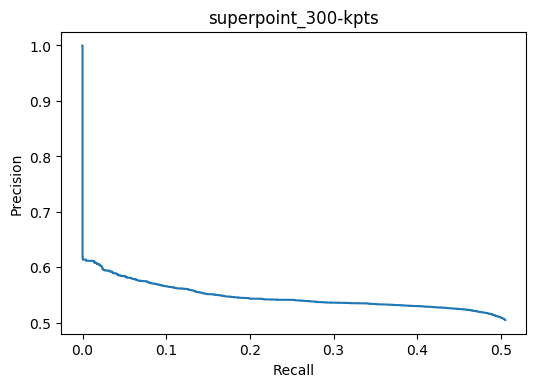

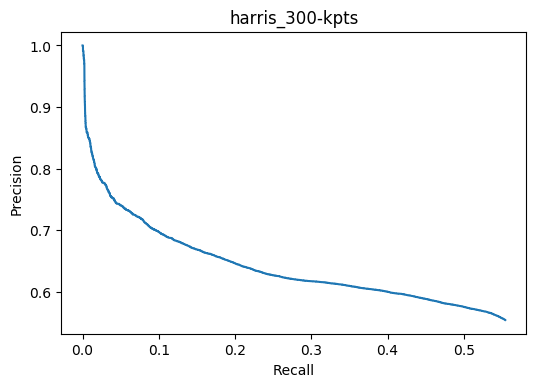